# Principe



In [1]:
verbose = True
def affichage_debut_partition(T,premier,dernier):
    if verbose: print(T[premier:dernier-1],T[dernier-1],end=" => ")

def affichage_fin_partition(T,premier,dernier,i):
    if verbose: print(T[premier:i],T[i],T[i+1:dernier])

In [2]:
TAB = [ 7, 6, 2, 1, 3, 5, 8, 4 ]
print(TAB)

[7, 6, 2, 1, 3, 5, 8, 4]


# Partition

In [3]:
def partition(T,premier,dernier):
    affichage_debut_partition(T,premier,dernier)
    
    pivot = dernier-1

    i = premier-1
    j = pivot

    while True:
        while True:
            i += 1
            if T[pivot] <= T[i]:
                break
        while True:
            j -= 1
            if j < premier or T[j] <= T[pivot]:
                break
        if j < i:
            break
        T[i],T[j] = T[j],T[i]
        
    T[i],T[pivot] = T[pivot],T[i]
        
    affichage_fin_partition(T,premier,dernier,i)

    return i

In [4]:
T = TAB.copy()
pivot = partition(T,0,len(T))

[7, 6, 2, 1, 3, 5, 8] 4 => [3, 1, 2] 4 [7, 5, 8, 6]


In [5]:
p = partition(T,0,pivot)

[3, 1] 2 => [1] 2 [3]


In [6]:
p = partition(T,pivot+1,len(T))

[7, 5, 8] 6 => [5] 6 [8, 7]


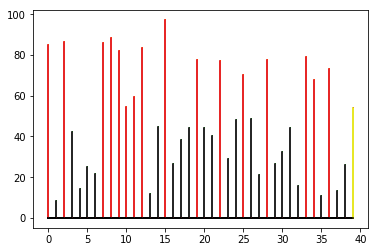

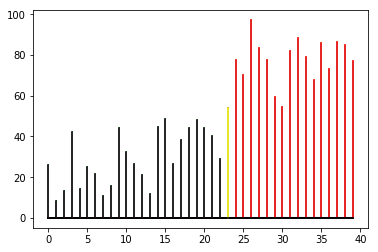

In [25]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import include.helpers as hlp

def affiche_partition(T,start,end,p):
    X = list(range(0,len(T)))
    plt.stem(X,T,markerfmt=',',linefmt='grey',basefmt='black')
    PG = [ t if i >= start and i < end and t > T[p] else 0 for i,t in enumerate(T) ]
    plt.stem(X,PG,markerfmt=',',linefmt='red',basefmt='black')
    PP = [ t if i >= start and i < end and t <= T[p] and i != p else 0 for i,t in enumerate(T) ]
    plt.stem(X,PP,markerfmt=',',linefmt='black',basefmt='black')
    PIV = [0]*len(T); PIV[p] = T[p]
    plt.stem(X,PIV,markerfmt=',',linefmt='yellow',basefmt='black')
    plt.show()
    
  
verbose = False

T = np.random.uniform(0,100,40)
T[len(T)-1] = np.average(T) + 5
affiche_partition(T,0,len(T),len(T)-1)
i = partition(T,0,len(T))
affiche_partition(T,0,len(T),i)

verbose = True


# Algorithme récursif

In [8]:
def tri_rapide_rec(T,premier,dernier):
    if premier < dernier-1:           # au moins deux éléments
        
        pivot = choix_du_pivot(T,premier,dernier);
        T[dernier-1],T[pivot] = T[pivot],T[dernier-1]
    
        pivot = partition(T,premier,dernier)
        tri_rapide_rec(T,premier,pivot)
        tri_rapide_rec(T,pivot+1,dernier)
        
def tri_rapide(T):
    tri_rapide_rec(T,0,len(T))

In [9]:
def choix_du_pivot(T,premier,dernier):
    return dernier-1

In [10]:
T = TAB.copy()
tri_rapide(T)

[7, 6, 2, 1, 3, 5, 8] 4 => [3, 1, 2] 4 [7, 5, 8, 6]
[3, 1] 2 => [1] 2 [3]
[7, 5, 8] 6 => [5] 6 [8, 7]
[8] 7 => [] 7 [8]


# Complexité

In [11]:
def tri_rapide_rec_cnt(T,premier,dernier):
    nb_comparaisons = nb_echanges = 0

    if premier < dernier-1:
        
        pivot, nc = choix_du_pivot_cnt(T,premier,dernier);
        nb_comparaisons += nc
        
        T[dernier-1],T[pivot] = T[pivot],T[dernier-1]
        pivot = dernier-1
        
        i = premier-1
        j = pivot

        while True:
            while True:
                i += 1
                nb_comparaisons += 1
                if T[pivot] <= T[i]: 
                    break
            while True:
                j -= 1
                nb_comparaisons += 1
                if j < premier or T[j] <= T[pivot]:
                    break
            if j < i:
                break
            T[i],T[j] = T[j],T[i]; nb_echanges += 1

        T[i],T[pivot] = T[pivot],T[i]; nb_echanges += 1
        
        nc1, ne1 = tri_rapide_rec_cnt(T,premier,i)
        nc2, ne2 = tri_rapide_rec_cnt(T,i+1,dernier)
        
        return nb_comparaisons + nc1 + nc2, nb_echanges + ne1 + ne2
    else:
        return 0,0
        
def tri_rapide_cnt(T):
    return tri_rapide_rec_cnt(T,0,len(T))

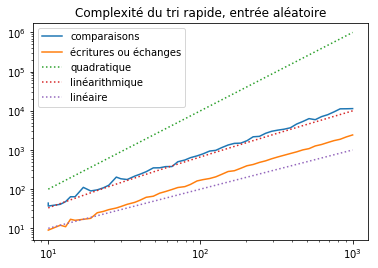

    N |     Comp. |      Ech.
-------------------------------
   10 |        44 |         9
   19 |        90 |        18
   37 |       215 |        46
   71 |       500 |       110
  138 |      1149 |       239
  268 |      2662 |       528
  517 |      6316 |      1082
 1000 |     11366 |      2419


In [12]:
def choix_du_pivot_cnt(T,premier,dernier):
    return dernier-1, 0

import include.helpers as hlp  
hlp.evalue_complexite(tri_rapide_cnt, 
                      hlp.tableau_aleatoire, 
                      "tri rapide, entrée aléatoire")

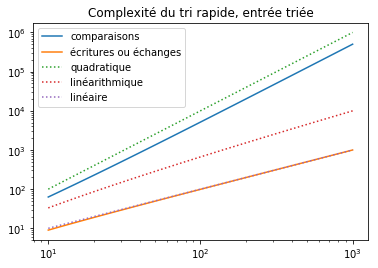

    N |     Comp. |      Ech.
-------------------------------
   10 |        63 |         9
   19 |       207 |        18
   37 |       738 |        36
   71 |      2625 |        70
  138 |      9727 |       137
  268 |     36312 |       267
  517 |    134418 |       516
 1000 |    501498 |       999


In [13]:
import include.helpers as hlp  
hlp.evalue_complexite(tri_rapide_cnt, 
                      hlp.tableau_trie, 
                      "tri rapide, entrée triée")

In [14]:
T = [ 1, 2, 3, 4, 5, 6, 7, 8]
tri_rapide(T)

[1, 2, 3, 4, 5, 6, 7] 8 => [1, 2, 3, 4, 5, 6, 7] 8 []
[1, 2, 3, 4, 5, 6] 7 => [1, 2, 3, 4, 5, 6] 7 []
[1, 2, 3, 4, 5] 6 => [1, 2, 3, 4, 5] 6 []
[1, 2, 3, 4] 5 => [1, 2, 3, 4] 5 []
[1, 2, 3] 4 => [1, 2, 3] 4 []
[1, 2] 3 => [1, 2] 3 []
[1] 2 => [1] 2 []


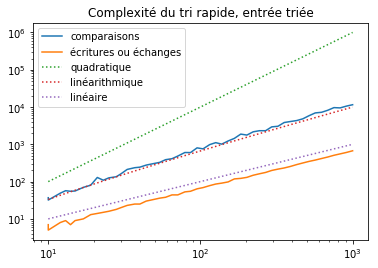

    N |     Comp. |      Ech.
-------------------------------
   10 |        37 |         7
   19 |        80 |        13
   37 |       236 |        25
   71 |       484 |        44
  138 |      1011 |        91
  268 |      2315 |       176
  517 |      5850 |       348
 1000 |     11527 |       671


In [15]:
import numpy as np

def choix_du_pivot_cnt(T,premier,dernier):
    return np.random.randint(premier,dernier), 0
    
hlp.evalue_complexite(tri_rapide_cnt, 
                      hlp.tableau_trie, 
                      "tri rapide, entrée triée")

In [16]:
def index_median_cnt(T,i1,i2,i3):
    if T[i1] < T[i2]:
        if T[i2] < T[i3]:
            return i2, 2
        elif T[i1] < T[i3]:
            return i3, 3
        else:
            return i1, 3
    else:
        if T[i1] < T[i3]:
            return i1, 2
        elif T[i2] < T[i3]:
            return i3, 3
        else:
            return i2, 3

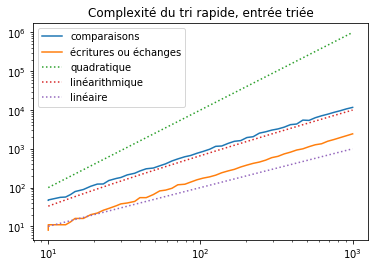

    N |     Comp. |      Ech.
-------------------------------
   10 |        47 |         8
   19 |       108 |        20
   37 |       234 |        44
   71 |       548 |       118
  138 |      1180 |       241
  268 |      2740 |       509
  517 |      5396 |      1135
 1000 |     11680 |      2431


In [17]:
def choix_du_pivot_cnt(T,premier,dernier):
    return index_median_cnt(T,premier,dernier-1,premier+(dernier-premier)//2)
    
hlp.evalue_complexite(tri_rapide_cnt, 
                      hlp.tableau_aleatoire, 
                      "tri rapide, entrée triée")

# Stabilité

Le tri rapide n'est pas stable. L'opération de partition déplace les éléments selon leur comparaison avec le pivot et rien ne garantit que deux éléments égaux restent ordonnés pareillement. 

Une question se pose cependant. Comment traite-t-on les éléments égaux au pivot lors de la partition? 

In [18]:
def tableau_uniforme(n):
    return [1]*n

T = tableau_uniforme(10)
tri_rapide(T)

[1, 1, 1, 1, 1, 1, 1, 1, 1] 1 => [1, 1, 1, 1, 1] 1 [1, 1, 1, 1]
[1, 1, 1, 1] 1 => [1, 1] 1 [1, 1]
[1] 1 => [1] 1 []
[1] 1 => [1] 1 []
[1, 1, 1] 1 => [1, 1] 1 [1]
[1] 1 => [1] 1 []


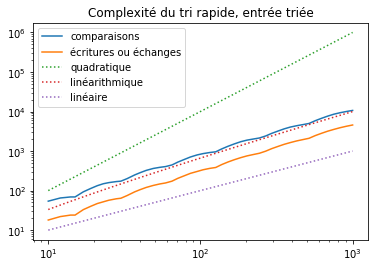

    N |     Comp. |      Ech.
-------------------------------
   10 |        54 |        18
   19 |       113 |        40
   37 |       249 |        93
   71 |       525 |       204
  138 |      1132 |       455
  268 |      2402 |       991
  517 |      4985 |      2101
 1000 |     10653 |      4560


In [19]:
hlp.evalue_complexite(tri_rapide_cnt, 
                      tableau_uniforme, 
                      "tri rapide, entrée triée")

In [20]:
def tri_rapide_rec_cnt_bug(T,premier,dernier):

    nb_comparaisons = nb_echanges = 0

    if premier < dernier-1:
        
        affichage_debut_partition(T,premier,dernier)


        pivot, nc = choix_du_pivot_cnt(T,premier,dernier);
        nb_comparaisons += nc
        
        T[dernier-1],T[pivot] = T[pivot],T[dernier-1]
        pivot = dernier-1
        
        i = premier-1
        j = pivot

        while True:
            while True:
                i += 1
                nb_comparaisons += 1
                if i >= pivot or T[pivot] < T[i]: 
                    break
            while True:
                j -= 1
                nb_comparaisons += 1
                if j < premier or T[j] < T[pivot]:
                    break
            if j < i:
                break
            T[i],T[j] = T[j],T[i]; nb_echanges += 1

        T[i],T[pivot] = T[pivot],T[i]; nb_echanges += 1
        
        affichage_fin_partition(T,premier,dernier,i)

        nc1, ne1 = tri_rapide_rec_cnt_bug(T,premier,i)
        nc2, ne2 = tri_rapide_rec_cnt_bug(T,i+1,dernier)
        
        return nb_comparaisons + nc1 + nc2, nb_echanges + ne1 + ne2
    else:
        return 0,0
        
def tri_rapide_cnt_bug(T):
    return tri_rapide_rec_cnt_bug(T,0,len(T))

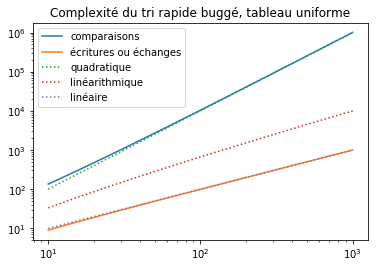

    N |     Comp. |      Ech.
-------------------------------
   10 |       135 |         9
   19 |       432 |        18
   37 |      1512 |        36
   71 |      5320 |        70
  138 |     19591 |       137
  268 |     72891 |       267
  517 |    269352 |       516
 1000 |   1003995 |       999


In [21]:
verbose = False
hlp.evalue_complexite(tri_rapide_cnt_bug, 
                      tableau_uniforme, 
                      "tri rapide buggé, tableau uniforme")

In [22]:
verbose = True
T = tableau_uniforme(10)
cnt = tri_rapide_cnt_bug(T)

[1, 1, 1, 1, 1, 1, 1, 1, 1] 1 => [1, 1, 1, 1, 1, 1, 1, 1, 1] 1 []
[1, 1, 1, 1, 1, 1, 1, 1] 1 => [1, 1, 1, 1, 1, 1, 1, 1] 1 []
[1, 1, 1, 1, 1, 1, 1] 1 => [1, 1, 1, 1, 1, 1, 1] 1 []
[1, 1, 1, 1, 1, 1] 1 => [1, 1, 1, 1, 1, 1] 1 []
[1, 1, 1, 1, 1] 1 => [1, 1, 1, 1, 1] 1 []
[1, 1, 1, 1] 1 => [1, 1, 1, 1] 1 []
[1, 1, 1] 1 => [1, 1, 1] 1 []
[1, 1] 1 => [1, 1] 1 []
[1] 1 => [1] 1 []


# Visualisation

In [23]:
def tri_rapide_rec_visu(T,premier,dernier):

    if premier < dernier-1:
        
        pivot = dernier-1;
        
        T[dernier-1],T[pivot] = T[pivot],T[dernier-1]
        pivot = dernier-1
        
        i = premier-1
        j = pivot

        while True:
            while True:
                i += 1
                if T[pivot] <= T[i]: 
                    break
            while True:
                j -= 1
                if j < premier or T[j] <= T[pivot]:
                    break
            if j < i:
                break
            T[i],T[j] = T[j],T[i];

        T[i],T[pivot] = T[pivot],T[i]; 
        
        affiche_partition(T,premier,dernier,i)
        
        tri_rapide_rec_visu(T,premier,i)
        tri_rapide_rec_visu(T,i+1,dernier)
        
def tri_rapide_visu():
    T = np.random.uniform(0,100,30)
    tri_rapide_rec_visu(T,0,len(T))
    plt.stem(T,markerfmt=',',linefmt='black',basefmt='black')




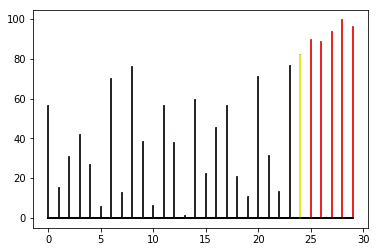

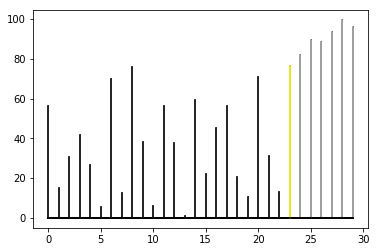

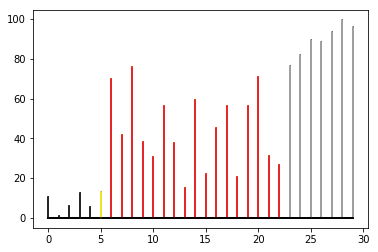

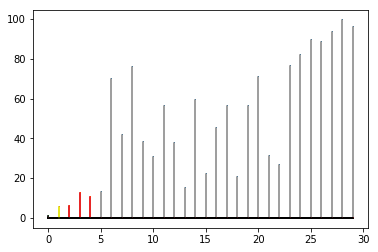

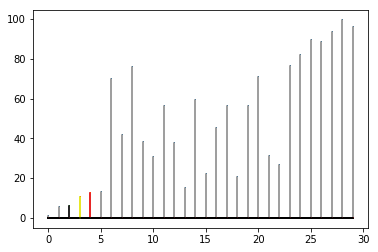

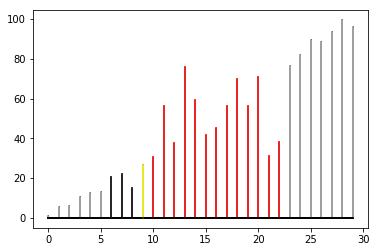

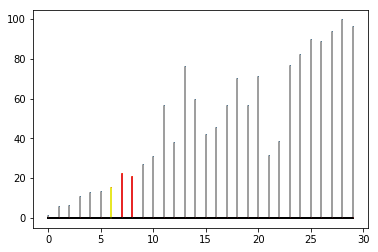

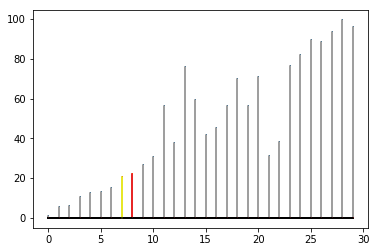

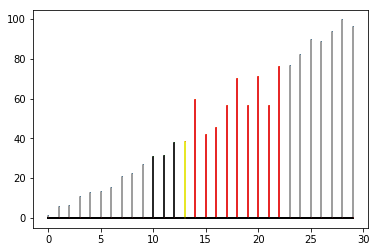

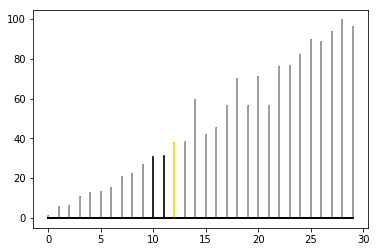

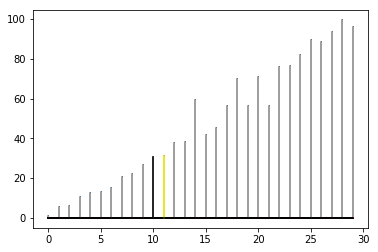

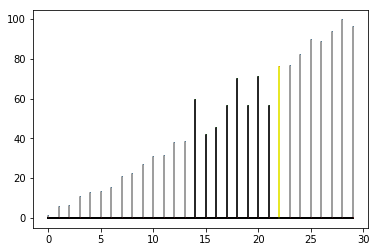

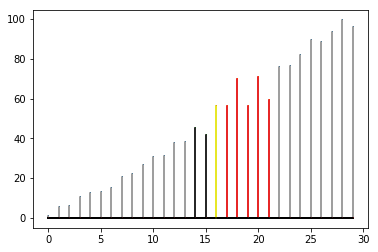

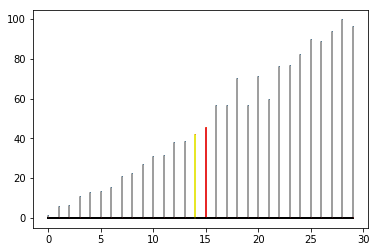

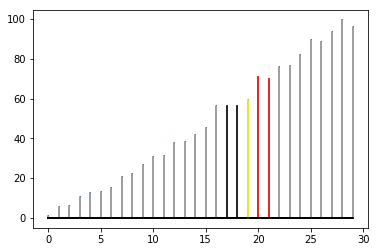

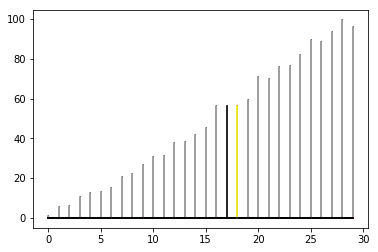

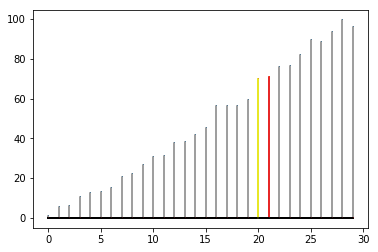

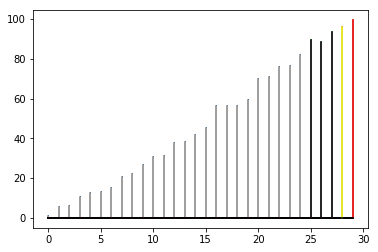

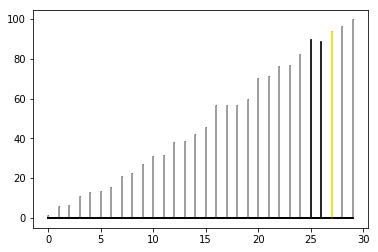

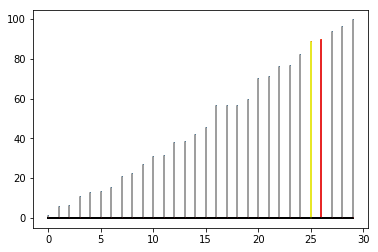

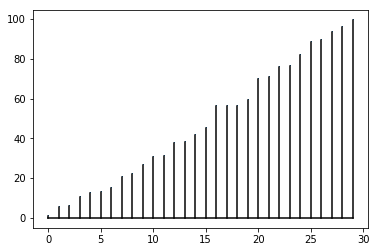

In [24]:
tri_rapide_visu()